In [235]:
import json
import csv
from copy import deepcopy
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import os
import joypy
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# from IPython.core.display import display, HTML
# !display(HTML(“<style>.container { width:80% !important; }</style>“))

# BSC Pancakeswap
### Use the file in github rather than loading all these files

In [257]:
#bsc pancakeswap
cake_4_1 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_1.txt'))
cake_4_2 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_2.txt'))
cake_4_3 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_3.txt'))
cake_4_4 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_4.txt'))
cake_4_5 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_5.txt'))
cake_4_6 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_6.txt'))
cake_4_7 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_7.txt'))
cake_4_8 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_8.txt'))
cake_4_9 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_9.txt'))
cake_4_10 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_10.txt'))
cake_4_11 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_11.txt'))
cake_4_12 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_12.txt'))
cake_4_13 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_13.txt'))
cake_4_14 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_14.txt'))
cake_4_15 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_15.txt'))
cake_4_16 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_16.txt'))
cake_4_17 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_17.txt'))
cake_4_18 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_18.txt'))
cake_4_19 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_19.txt'))
cake_4_20 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_20.txt'))
cake_4_21 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_21.txt'))
cake_4_22 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_22.txt'))
cake_4_23 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_23.txt'))
cake_4_24 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_24.txt'))
cake_4_25 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_25.txt'))
cake_4_26 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_26.txt'))
cake_4_27 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_27.txt'))
cake_4_28 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_28.txt'))
cake_4_29 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_29.txt'))
cake_4_30 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_30.txt'))
cake_5_1 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_1.txt'))
cake_5_2 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_2.txt'))
cake_5_3 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_3.txt'))
cake_5_4 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_4.txt'))
cake_5_5 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_5.txt'))
cake_5_6 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_6.txt'))
cake_5_7 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_7.txt'))
cake_5_8 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_8.txt'))
cake_5_9 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_9.txt'))
cake_5_10 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_10.txt'))
cake_5_11 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_11.txt'))

cakes = [cake_4_1, cake_4_2, cake_4_3, cake_4_4, cake_4_5, cake_4_6
         , cake_4_7, cake_4_8, cake_4_9, cake_4_10, cake_4_11, cake_4_12
         , cake_4_13, cake_4_14, cake_4_15, cake_4_16, cake_4_17, cake_4_18
         , cake_4_19, cake_4_20, cake_4_21, cake_4_22, cake_4_23, cake_4_24
         , cake_4_25, cake_4_26, cake_4_27, cake_4_28, cake_4_29, cake_4_30
         , cake_5_1, cake_5_2, cake_5_3, cake_5_4, cake_5_5, cake_5_6, cake_5_7
         , cake_5_8, cake_5_9, cake_5_10, cake_5_11]

dirpath = '/Users/max.bade/Downloads/pancakeswap/'
output = '/Users/max.bade/Downloads/pancakeswap/output/pancakeswap.csv'
csvout_lst = []
files = [os.path.join(dirpath, fname) for fname in os.listdir(dirpath)]

# for filename in sorted(files):
for filename in cakes:
    
    def cross_join(left, right):
        new_rows = []
        for left_row in left:
            for right_row in right:
                temp_row = deepcopy(left_row)
                for key, value in right_row.items():
                    temp_row[key] = value
                new_rows.append(deepcopy(temp_row))
        return new_rows


    def flatten_list(data):
        for elem in data:
            if isinstance(elem, list):
                yield from flatten_list(elem)
            else:
                yield elem


    def json_to_dataframe(data_in):
        def flatten_json(data, prev_heading=''):
            if isinstance(data, dict):
                rows = [{}]
                for key, value in data.items():
                    rows = cross_join(rows, flatten_json(value, prev_heading + '.' + key))
            elif isinstance(data, list):
                rows = []
                for i in range(len(data)):
                    [rows.append(elem) for elem in flatten_list(flatten_json(data[i], prev_heading))]
            else:
                rows = [{prev_heading[1:]: data}]
            return rows

        return pd.DataFrame(flatten_json(data_in))

    if __name__ == '__main__':
        data = json_to_dataframe(filename)
        csvout_lst.append(data)
        
    pd.concat(csvout_lst).to_csv(output)
    
df = pd.read_csv(output)
df.columns = ['index_duplicate','buy_symbol','sell_symbol','#_trades','trade_amount_$']
del df['index_duplicate']
df['num_trades_x_tradeamount'] = df['#_trades'] * df['trade_amount_$']
# df = df.sort_values(by='num_trades_x_tradeamount',ascending=False).reset_index()
# del df['index']

start = pd.to_datetime("4/1/2021")
df['trade_date'] = pd.Series(np.arange(len(df)) // 1000) \
              .apply(lambda x: pd.Timedelta(days=x)) + start

df['pair'] = df['buy_symbol'] + "/" + df['sell_symbol']
df['trade_date'] = pd.to_datetime(df['trade_date'])
df.sort_values(['pair','trade_date'], inplace = True, ascending=[True, True])
df['pct_ch'] = round(df.groupby(['pair'])['#_trades'].apply(lambda x: x/x.shift(1)-1).fillna(0)*100,2)
df['sum_pct_change'] = round(df['pct_ch'].groupby(df['pair']).transform('sum'),1)
df['avg_pct_change'] = round(df['pct_ch'].groupby(df['pair']).transform('mean'),1)
df['Week_Number'] = df['trade_date'].dt.week

coins_to_remove = ['BUSD','WBNB','ETH','USDT','USDC','BTC','Cake']
df = df[~df.buy_symbol.isin(coins_to_remove)]
print(df.shape)

filtered_coins = df.groupby(['Week_Number','pair'])['pct_ch'].agg('sum').reset_index()
filtered_coins.columns = ['Week_Number','pair','total_weekly_pct_ch']
filtered_coins = filtered_coins[filtered_coins['Week_Number'] == 19][['Week_Number','pair','total_weekly_pct_ch']]\
.sort_values(by='total_weekly_pct_ch',ascending=False).reset_index()
filtered_coins = filtered_coins[filtered_coins['total_weekly_pct_ch']>=50]
print(filtered_coins.shape)
print(filtered_coins.pair.nunique())

fig = px.bar(filtered_coins
             ,x='pair'
             ,y='total_weekly_pct_ch'
             ,color='pair'
             ,template='plotly_white'
             ,color_discrete_sequence=px.colors.qualitative.Pastel
             ,title='<b>Top Coin Pairs by Total Daily % Change This Week')
print(filtered_coins.head(10))
fig.show()

<ipython-input-257-2892d42a31f3>:118: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



(29279, 11)
(169, 4)
169
   index  Week_Number            pair  total_weekly_pct_ch
0   7413           19        PIG/WBNB            812850.03
1   7408           19        PIG/BUSD            127200.17
2   7956           19       SHIB/WBNB            109419.90
3   7732           19    SAFEBTC/WBNB             86700.06
4   6379           19       FINE/WBNB             27818.51
5   8365           19       TREE/WBNB             23600.51
6   6671           19        ICE/WBNB             16235.41
7   5925           19        COP/WBNB             15600.52
8   7741           19  SAFECOMET/WBNB             15500.41
9   7309           19        ONE/WBNB             11500.71


# Uniswap Eth network

In [258]:
#bsc pancakeswap
uni_4_1 = json.load(open('/Users/max.bade/Downloads/uniswap/4_1.txt'))
uni_4_2 = json.load(open('/Users/max.bade/Downloads/uniswap/4_2.txt'))
uni_4_3 = json.load(open('/Users/max.bade/Downloads/uniswap/4_3.txt'))
uni_4_4 = json.load(open('/Users/max.bade/Downloads/uniswap/4_4.txt'))
uni_4_5 = json.load(open('/Users/max.bade/Downloads/uniswap/4_5.txt'))
uni_4_6 = json.load(open('/Users/max.bade/Downloads/uniswap/4_6.txt'))
uni_4_7 = json.load(open('/Users/max.bade/Downloads/uniswap/4_7.txt'))
uni_4_8 = json.load(open('/Users/max.bade/Downloads/uniswap/4_8.txt'))
uni_4_9 = json.load(open('/Users/max.bade/Downloads/uniswap/4_9.txt'))
uni_4_10 = json.load(open('/Users/max.bade/Downloads/uniswap/4_10.txt'))
uni_4_11 = json.load(open('/Users/max.bade/Downloads/uniswap/4_11.txt'))
uni_4_12 = json.load(open('/Users/max.bade/Downloads/uniswap/4_12.txt'))
uni_4_13 = json.load(open('/Users/max.bade/Downloads/uniswap/4_13.txt'))
uni_4_14 = json.load(open('/Users/max.bade/Downloads/uniswap/4_14.txt'))
uni_4_15 = json.load(open('/Users/max.bade/Downloads/uniswap/4_15.txt'))
uni_4_16 = json.load(open('/Users/max.bade/Downloads/uniswap/4_16.txt'))
uni_4_17 = json.load(open('/Users/max.bade/Downloads/uniswap/4_17.txt'))
uni_4_18 = json.load(open('/Users/max.bade/Downloads/uniswap/4_18.txt'))
uni_4_19 = json.load(open('/Users/max.bade/Downloads/uniswap/4_19.txt'))
uni_4_20 = json.load(open('/Users/max.bade/Downloads/uniswap/4_20.txt'))
uni_4_21 = json.load(open('/Users/max.bade/Downloads/uniswap/4_21.txt'))
uni_4_22 = json.load(open('/Users/max.bade/Downloads/uniswap/4_22.txt'))
uni_4_23 = json.load(open('/Users/max.bade/Downloads/uniswap/4_23.txt'))
uni_4_24 = json.load(open('/Users/max.bade/Downloads/uniswap/4_24.txt'))
uni_4_25 = json.load(open('/Users/max.bade/Downloads/uniswap/4_25.txt'))
uni_4_26 = json.load(open('/Users/max.bade/Downloads/uniswap/4_26.txt'))
uni_4_27 = json.load(open('/Users/max.bade/Downloads/uniswap/4_27.txt'))
uni_4_28 = json.load(open('/Users/max.bade/Downloads/uniswap/4_28.txt'))
uni_4_29 = json.load(open('/Users/max.bade/Downloads/uniswap/4_29.txt'))
uni_4_30 = json.load(open('/Users/max.bade/Downloads/uniswap/4_30.txt'))
uni_5_1 = json.load(open('/Users/max.bade/Downloads/uniswap/5_1.txt'))
uni_5_2 = json.load(open('/Users/max.bade/Downloads/uniswap/5_2.txt'))
uni_5_3 = json.load(open('/Users/max.bade/Downloads/uniswap/5_3.txt'))
uni_5_4 = json.load(open('/Users/max.bade/Downloads/uniswap/5_4.txt'))
uni_5_5 = json.load(open('/Users/max.bade/Downloads/uniswap/5_5.txt'))
uni_5_6 = json.load(open('/Users/max.bade/Downloads/uniswap/5_6.txt'))
uni_5_7 = json.load(open('/Users/max.bade/Downloads/uniswap/5_7.txt'))
uni_5_8 = json.load(open('/Users/max.bade/Downloads/uniswap/5_8.txt'))
uni_5_9 = json.load(open('/Users/max.bade/Downloads/uniswap/5_9.txt'))
uni_5_10 = json.load(open('/Users/max.bade/Downloads/uniswap/5_10.txt'))
uni_5_11 = json.load(open('/Users/max.bade/Downloads/uniswap/5_11.txt'))


unis = [uni_4_1, uni_4_2, uni_4_3, uni_4_4, uni_4_5, uni_4_6
         , uni_4_7, uni_4_8, uni_4_9, uni_4_10, uni_4_11, uni_4_12
         , uni_4_13, uni_4_14, uni_4_15, uni_4_16, uni_4_17, uni_4_18
         , uni_4_19, uni_4_20, uni_4_21, uni_4_22, uni_4_23, uni_4_24
         , uni_4_25, uni_4_26, uni_4_27, uni_4_28, uni_4_29, uni_4_30
         , uni_5_1, uni_5_2, uni_5_3, uni_5_4, uni_5_5, uni_5_6, uni_5_7
         , uni_5_8, uni_5_9, uni_5_10, uni_5_11]

dirpath = '/Users/max.bade/Downloads/uniswap/'
output = '/Users/max.bade/Downloads/uniswap/output/uniswap.csv'
csvout_lst = []
files = [os.path.join(dirpath, fname) for fname in os.listdir(dirpath)]

# for filename in sorted(files):
for filename in unis:
    
    def cross_join(left, right):
        new_rows = []
        for left_row in left:
            for right_row in right:
                temp_row = deepcopy(left_row)
                for key, value in right_row.items():
                    temp_row[key] = value
                new_rows.append(deepcopy(temp_row))
        return new_rows


    def flatten_list(data):
        for elem in data:
            if isinstance(elem, list):
                yield from flatten_list(elem)
            else:
                yield elem


    def json_to_dataframe(data_in):
        def flatten_json(data, prev_heading=''):
            if isinstance(data, dict):
                rows = [{}]
                for key, value in data.items():
                    rows = cross_join(rows, flatten_json(value, prev_heading + '.' + key))
            elif isinstance(data, list):
                rows = []
                for i in range(len(data)):
                    [rows.append(elem) for elem in flatten_list(flatten_json(data[i], prev_heading))]
            else:
                rows = [{prev_heading[1:]: data}]
            return rows

        return pd.DataFrame(flatten_json(data_in))

    if __name__ == '__main__':
        data = json_to_dataframe(filename)
        csvout_lst.append(data)
        
    pd.concat(csvout_lst).to_csv(output)
    
df = pd.read_csv(output)
df.columns = ['index_duplicate','buy_symbol','sell_symbol','#_trades','trade_amount_$']
del df['index_duplicate']
df['num_trades_x_tradeamount'] = df['#_trades'] * df['trade_amount_$']
# df = df.sort_values(by='num_trades_x_tradeamount',ascending=False).reset_index()
# del df['index']

start = pd.to_datetime("4/1/2021")
df['trade_date'] = pd.Series(np.arange(len(df)) // 1000) \
              .apply(lambda x: pd.Timedelta(days=x)) + start

df['pair'] = df['buy_symbol'] + "/" + df['sell_symbol']
df['trade_date'] = pd.to_datetime(df['trade_date'])
df.sort_values(['pair','trade_date'], inplace = True, ascending=[True, True])
df['pct_ch'] = round(df.groupby(['pair'])['#_trades'].apply(lambda x: x/x.shift(1)-1).fillna(0)*100,2)
df['sum_pct_change'] = round(df['pct_ch'].groupby(df['pair']).transform('sum'),1)
df['avg_pct_change'] = round(df['pct_ch'].groupby(df['pair']).transform('mean'),1)
df['Week_Number'] = df['trade_date'].dt.week

coins_to_remove = ['BUSD','WBNB','ETH','USDT','USDC','BTC','Cake','WETH','?']
df = df[~df.buy_symbol.isin(coins_to_remove)]
print(df.shape)

filtered_coins = df.groupby(['Week_Number','pair'])['pct_ch'].agg('sum').reset_index()
filtered_coins.columns = ['Week_Number','pair','total_weekly_pct_ch']
filtered_coins = filtered_coins[filtered_coins['Week_Number'] == 19][['Week_Number','pair','total_weekly_pct_ch']]\
.sort_values(by='total_weekly_pct_ch',ascending=False).reset_index()
filtered_coins = filtered_coins[filtered_coins['total_weekly_pct_ch']>=50]
print(filtered_coins.shape)
print(filtered_coins.pair.nunique())

fig = px.bar(filtered_coins
             ,x='pair'
             ,y='total_weekly_pct_ch'
             ,color='pair'
             ,template='plotly_white'
             ,color_discrete_sequence=px.colors.qualitative.Pastel
             ,title='<b>Top Coin Pairs by Total Daily % Change This Week')
print(filtered_coins.head(10))
fig.show()

(21613, 11)
(62, 4)
62
   index  Week_Number         pair  total_weekly_pct_ch
0   5233           19    FOGE/WETH              3918.96
1   5565           19   TKING/WETH              2164.52
2   5578           19     TRU/WETH              1087.92
3   5701           19   xFUND/WETH               843.98
4   5304           19  JSHIBA/WETH               390.64
5   5288           19    HORD/WETH               346.46
6   5604           19    UST/mVIXY               310.00
7   5409           19    NPXS/WETH               281.08
8   5271           19     GUM/WETH               264.50
9   5498           19    ROOM/WETH               263.66


<ipython-input-258-2ffd4dc30976>:119: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



# Pancakeswap today

In [276]:
#bsc pancakeswap
cake_4_1 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_1.txt'))
cake_4_2 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_2.txt'))
cake_4_3 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_3.txt'))
cake_4_4 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_4.txt'))
cake_4_5 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_5.txt'))
cake_4_6 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_6.txt'))
cake_4_7 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_7.txt'))
cake_4_8 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_8.txt'))
cake_4_9 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_9.txt'))
cake_4_10 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_10.txt'))
cake_4_11 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_11.txt'))
cake_4_12 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_12.txt'))
cake_4_13 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_13.txt'))
cake_4_14 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_14.txt'))
cake_4_15 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_15.txt'))
cake_4_16 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_16.txt'))
cake_4_17 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_17.txt'))
cake_4_18 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_18.txt'))
cake_4_19 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_19.txt'))
cake_4_20 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_20.txt'))
cake_4_21 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_21.txt'))
cake_4_22 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_22.txt'))
cake_4_23 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_23.txt'))
cake_4_24 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_24.txt'))
cake_4_25 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_25.txt'))
cake_4_26 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_26.txt'))
cake_4_27 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_27.txt'))
cake_4_28 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_28.txt'))
cake_4_29 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_29.txt'))
cake_4_30 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_30.txt'))
cake_5_1 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_1.txt'))
cake_5_2 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_2.txt'))
cake_5_3 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_3.txt'))
cake_5_4 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_4.txt'))
cake_5_5 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_5.txt'))
cake_5_6 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_6.txt'))
cake_5_7 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_7.txt'))
cake_5_8 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_8.txt'))
cake_5_9 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_9.txt'))
cake_5_10 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_10.txt'))
cake_5_11 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_11.txt'))

cakes = [cake_4_1, cake_4_2, cake_4_3, cake_4_4, cake_4_5, cake_4_6
         , cake_4_7, cake_4_8, cake_4_9, cake_4_10, cake_4_11, cake_4_12
         , cake_4_13, cake_4_14, cake_4_15, cake_4_16, cake_4_17, cake_4_18
         , cake_4_19, cake_4_20, cake_4_21, cake_4_22, cake_4_23, cake_4_24
         , cake_4_25, cake_4_26, cake_4_27, cake_4_28, cake_4_29, cake_4_30
         , cake_5_1, cake_5_2, cake_5_3, cake_5_4, cake_5_5, cake_5_6, cake_5_7
         , cake_5_8, cake_5_9, cake_5_10, cake_5_11]

dirpath = '/Users/max.bade/Downloads/pancakeswap/'
output = '/Users/max.bade/Downloads/pancakeswap/output/pancakeswap.csv'
csvout_lst = []
files = [os.path.join(dirpath, fname) for fname in os.listdir(dirpath)]

# for filename in sorted(files):
for filename in cakes:
    
    def cross_join(left, right):
        new_rows = []
        for left_row in left:
            for right_row in right:
                temp_row = deepcopy(left_row)
                for key, value in right_row.items():
                    temp_row[key] = value
                new_rows.append(deepcopy(temp_row))
        return new_rows


    def flatten_list(data):
        for elem in data:
            if isinstance(elem, list):
                yield from flatten_list(elem)
            else:
                yield elem


    def json_to_dataframe(data_in):
        def flatten_json(data, prev_heading=''):
            if isinstance(data, dict):
                rows = [{}]
                for key, value in data.items():
                    rows = cross_join(rows, flatten_json(value, prev_heading + '.' + key))
            elif isinstance(data, list):
                rows = []
                for i in range(len(data)):
                    [rows.append(elem) for elem in flatten_list(flatten_json(data[i], prev_heading))]
            else:
                rows = [{prev_heading[1:]: data}]
            return rows

        return pd.DataFrame(flatten_json(data_in))

    if __name__ == '__main__':
        data = json_to_dataframe(filename)
        csvout_lst.append(data)
        
    pd.concat(csvout_lst).to_csv(output)
    
df = pd.read_csv(output)
df.columns = ['index_duplicate','buy_symbol','sell_symbol','#_trades','trade_amount_$']
del df['index_duplicate']
df['num_trades_x_tradeamount'] = df['#_trades'] * df['trade_amount_$']
# df = df.sort_values(by='num_trades_x_tradeamount',ascending=False).reset_index()
# del df['index']

today = pd.Timestamp("today").strftime("%Y-%m-%d")
start = pd.to_datetime("4/1/2021")
df['trade_date'] = pd.Series(np.arange(len(df)) // 1000) \
              .apply(lambda x: pd.Timedelta(days=x)) + start

df['pair'] = df['buy_symbol'] + "/" + df['sell_symbol']
df['trade_date'] = pd.to_datetime(df['trade_date'])
df.sort_values(['pair','trade_date'], inplace = True, ascending=[True, True])
df['pct_ch'] = round(df.groupby(['pair'])['#_trades'].apply(lambda x: x/x.shift(1)-1).fillna(0)*100,2)
df['sum_pct_change'] = round(df['pct_ch'].groupby(df['pair']).transform('sum'),1)
df['avg_pct_change'] = round(df['pct_ch'].groupby(df['pair']).transform('mean'),1)
df['Week_Number'] = df['trade_date'].dt.week

coins_to_remove = ['BUSD','WBNB','ETH','USDT','USDC','BTC','Cake']
df = df[~df.buy_symbol.isin(coins_to_remove)]
print(df.shape)

filtered_coins = df.groupby(['trade_date','pair'])['pct_ch'].agg('sum').reset_index()
filtered_coins.columns = ['trade_date','pair','total_weekly_pct_ch']
filtered_coins = filtered_coins[filtered_coins['trade_date'] == today][['trade_date','pair','total_weekly_pct_ch']]\
.sort_values(by='total_weekly_pct_ch',ascending=False).reset_index()
filtered_coins = filtered_coins[filtered_coins['total_weekly_pct_ch']>=50]
print(filtered_coins.shape)
print(filtered_coins.pair.nunique())

fig = px.bar(filtered_coins
             ,x='pair'
             ,y='total_weekly_pct_ch'
             ,color='pair'
             ,template='plotly_white'
             ,color_discrete_sequence=px.colors.qualitative.Pastel
             ,title='<b>Top Coin Pairs by Total Daily % Change Today')
print(filtered_coins.head(10))
fig.show()

(29279, 11)
(2, 4)
2
   index trade_date       pair  total_weekly_pct_ch
0  20632 2021-05-11  SAFU/WBNB               101.35
1  20381 2021-05-11  DUCK/WBNB                66.67


<ipython-input-276-bb7efddcfcd1>:119: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



# Uniswap Today

In [278]:
#bsc pancakeswap
uni_4_1 = json.load(open('/Users/max.bade/Downloads/uniswap/4_1.txt'))
uni_4_2 = json.load(open('/Users/max.bade/Downloads/uniswap/4_2.txt'))
uni_4_3 = json.load(open('/Users/max.bade/Downloads/uniswap/4_3.txt'))
uni_4_4 = json.load(open('/Users/max.bade/Downloads/uniswap/4_4.txt'))
uni_4_5 = json.load(open('/Users/max.bade/Downloads/uniswap/4_5.txt'))
uni_4_6 = json.load(open('/Users/max.bade/Downloads/uniswap/4_6.txt'))
uni_4_7 = json.load(open('/Users/max.bade/Downloads/uniswap/4_7.txt'))
uni_4_8 = json.load(open('/Users/max.bade/Downloads/uniswap/4_8.txt'))
uni_4_9 = json.load(open('/Users/max.bade/Downloads/uniswap/4_9.txt'))
uni_4_10 = json.load(open('/Users/max.bade/Downloads/uniswap/4_10.txt'))
uni_4_11 = json.load(open('/Users/max.bade/Downloads/uniswap/4_11.txt'))
uni_4_12 = json.load(open('/Users/max.bade/Downloads/uniswap/4_12.txt'))
uni_4_13 = json.load(open('/Users/max.bade/Downloads/uniswap/4_13.txt'))
uni_4_14 = json.load(open('/Users/max.bade/Downloads/uniswap/4_14.txt'))
uni_4_15 = json.load(open('/Users/max.bade/Downloads/uniswap/4_15.txt'))
uni_4_16 = json.load(open('/Users/max.bade/Downloads/uniswap/4_16.txt'))
uni_4_17 = json.load(open('/Users/max.bade/Downloads/uniswap/4_17.txt'))
uni_4_18 = json.load(open('/Users/max.bade/Downloads/uniswap/4_18.txt'))
uni_4_19 = json.load(open('/Users/max.bade/Downloads/uniswap/4_19.txt'))
uni_4_20 = json.load(open('/Users/max.bade/Downloads/uniswap/4_20.txt'))
uni_4_21 = json.load(open('/Users/max.bade/Downloads/uniswap/4_21.txt'))
uni_4_22 = json.load(open('/Users/max.bade/Downloads/uniswap/4_22.txt'))
uni_4_23 = json.load(open('/Users/max.bade/Downloads/uniswap/4_23.txt'))
uni_4_24 = json.load(open('/Users/max.bade/Downloads/uniswap/4_24.txt'))
uni_4_25 = json.load(open('/Users/max.bade/Downloads/uniswap/4_25.txt'))
uni_4_26 = json.load(open('/Users/max.bade/Downloads/uniswap/4_26.txt'))
uni_4_27 = json.load(open('/Users/max.bade/Downloads/uniswap/4_27.txt'))
uni_4_28 = json.load(open('/Users/max.bade/Downloads/uniswap/4_28.txt'))
uni_4_29 = json.load(open('/Users/max.bade/Downloads/uniswap/4_29.txt'))
uni_4_30 = json.load(open('/Users/max.bade/Downloads/uniswap/4_30.txt'))
uni_5_1 = json.load(open('/Users/max.bade/Downloads/uniswap/5_1.txt'))
uni_5_2 = json.load(open('/Users/max.bade/Downloads/uniswap/5_2.txt'))
uni_5_3 = json.load(open('/Users/max.bade/Downloads/uniswap/5_3.txt'))
uni_5_4 = json.load(open('/Users/max.bade/Downloads/uniswap/5_4.txt'))
uni_5_5 = json.load(open('/Users/max.bade/Downloads/uniswap/5_5.txt'))
uni_5_6 = json.load(open('/Users/max.bade/Downloads/uniswap/5_6.txt'))
uni_5_7 = json.load(open('/Users/max.bade/Downloads/uniswap/5_7.txt'))
uni_5_8 = json.load(open('/Users/max.bade/Downloads/uniswap/5_8.txt'))
uni_5_9 = json.load(open('/Users/max.bade/Downloads/uniswap/5_9.txt'))
uni_5_10 = json.load(open('/Users/max.bade/Downloads/uniswap/5_10.txt'))
uni_5_11 = json.load(open('/Users/max.bade/Downloads/uniswap/5_11.txt'))


unis = [uni_4_1, uni_4_2, uni_4_3, uni_4_4, uni_4_5, uni_4_6
         , uni_4_7, uni_4_8, uni_4_9, uni_4_10, uni_4_11, uni_4_12
         , uni_4_13, uni_4_14, uni_4_15, uni_4_16, uni_4_17, uni_4_18
         , uni_4_19, uni_4_20, uni_4_21, uni_4_22, uni_4_23, uni_4_24
         , uni_4_25, uni_4_26, uni_4_27, uni_4_28, uni_4_29, uni_4_30
         , uni_5_1, uni_5_2, uni_5_3, uni_5_4, uni_5_5, uni_5_6, uni_5_7
         , uni_5_8, uni_5_9, uni_5_10, uni_5_11]

dirpath = '/Users/max.bade/Downloads/uniswap/'
output = '/Users/max.bade/Downloads/uniswap/output/uniswap.csv'
csvout_lst = []
files = [os.path.join(dirpath, fname) for fname in os.listdir(dirpath)]

# for filename in sorted(files):
for filename in unis:
    
    def cross_join(left, right):
        new_rows = []
        for left_row in left:
            for right_row in right:
                temp_row = deepcopy(left_row)
                for key, value in right_row.items():
                    temp_row[key] = value
                new_rows.append(deepcopy(temp_row))
        return new_rows


    def flatten_list(data):
        for elem in data:
            if isinstance(elem, list):
                yield from flatten_list(elem)
            else:
                yield elem


    def json_to_dataframe(data_in):
        def flatten_json(data, prev_heading=''):
            if isinstance(data, dict):
                rows = [{}]
                for key, value in data.items():
                    rows = cross_join(rows, flatten_json(value, prev_heading + '.' + key))
            elif isinstance(data, list):
                rows = []
                for i in range(len(data)):
                    [rows.append(elem) for elem in flatten_list(flatten_json(data[i], prev_heading))]
            else:
                rows = [{prev_heading[1:]: data}]
            return rows

        return pd.DataFrame(flatten_json(data_in))

    if __name__ == '__main__':
        data = json_to_dataframe(filename)
        csvout_lst.append(data)
        
    pd.concat(csvout_lst).to_csv(output)
    
df = pd.read_csv(output)
df.columns = ['index_duplicate','buy_symbol','sell_symbol','#_trades','trade_amount_$']
del df['index_duplicate']
df['num_trades_x_tradeamount'] = df['#_trades'] * df['trade_amount_$']
# df = df.sort_values(by='num_trades_x_tradeamount',ascending=False).reset_index()
# del df['index']

today = pd.Timestamp("today").strftime("%Y-%m-%d")
start = pd.to_datetime("4/1/2021")
df['trade_date'] = pd.Series(np.arange(len(df)) // 1000) \
              .apply(lambda x: pd.Timedelta(days=x)) + start

df['pair'] = df['buy_symbol'] + "/" + df['sell_symbol']
df['trade_date'] = pd.to_datetime(df['trade_date'])
df.sort_values(['pair','trade_date'], inplace = True, ascending=[True, True])
df['pct_ch'] = round(df.groupby(['pair'])['#_trades'].apply(lambda x: x/x.shift(1)-1).fillna(0)*100,2)
df['sum_pct_change'] = round(df['pct_ch'].groupby(df['pair']).transform('sum'),1)
df['avg_pct_change'] = round(df['pct_ch'].groupby(df['pair']).transform('mean'),1)
df['Week_Number'] = df['trade_date'].dt.week

coins_to_remove = ['BUSD','WBNB','ETH','USDT','USDC','BTC','Cake','WETH','?']
df = df[~df.buy_symbol.isin(coins_to_remove)]
print(df.shape)

filtered_coins = df.groupby(['trade_date','pair'])['pct_ch'].agg('sum').reset_index()
filtered_coins.columns = ['trade_date','pair','total_weekly_pct_ch']
filtered_coins = filtered_coins[filtered_coins['trade_date'] == today][['trade_date','pair','total_weekly_pct_ch']]\
.sort_values(by='total_weekly_pct_ch',ascending=False).reset_index()
filtered_coins = filtered_coins[filtered_coins['total_weekly_pct_ch']>=50]
print(filtered_coins.shape)
print(filtered_coins.pair.nunique())

fig = px.bar(filtered_coins
             ,x='pair'
             ,y='total_weekly_pct_ch'
             ,color='pair'
             ,template='plotly_white'
             ,color_discrete_sequence=px.colors.qualitative.Pastel
             ,title='<b>Top Coin Pairs by Total Daily % Change Today')
print(filtered_coins.head(10))
fig.show()

(21613, 11)
(16, 4)
16
   index trade_date         pair  total_weekly_pct_ch
0  21354 2021-05-11   TKING/WETH              2164.52
1  21142 2021-05-11  JSHIBA/WETH               476.92
2  21222 2021-05-11    NAWA/USDC               300.00
3  21362 2021-05-11     TRU/WETH               299.66
4  21234 2021-05-11    NPXS/WETH               281.08
5  20964 2021-05-11    BCUG/WETH               260.00
6  21237 2021-05-11    OCTO/USDC               175.00
7  21385 2021-05-11    UST/mVIXY               160.00
8  21238 2021-05-11    OCTO/WETH               123.08
9  21423 2021-05-11     XXi/WETH               100.00


<ipython-input-278-4b874f471476>:120: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



# Top Buy and Sell Symbols

In [85]:
data = json.load(open('/Users/max.bade/Downloads/pancakeswap_coins.txt'))

def cross_join(left, right):
    new_rows = []
    for left_row in left:
        for right_row in right:
            temp_row = deepcopy(left_row)
            for key, value in right_row.items():
                temp_row[key] = value
            new_rows.append(deepcopy(temp_row))
    return new_rows


def flatten_list(data):
    for elem in data:
        if isinstance(elem, list):
            yield from flatten_list(elem)
        else:
            yield elem


def json_to_dataframe(data_in):
    def flatten_json(data, prev_heading=''):
        if isinstance(data, dict):
            rows = [{}]
            for key, value in data.items():
                rows = cross_join(rows, flatten_json(value, prev_heading + '.' + key))
        elif isinstance(data, list):
            rows = []
            for i in range(len(data)):
                [rows.append(elem) for elem in flatten_list(flatten_json(data[i], prev_heading))]
        else:
            rows = [{prev_heading[1:]: data}]
        return rows

    return pd.DataFrame(flatten_json(data_in))


if __name__ == '__main__':
    df = json_to_dataframe(data)
    df.columns = ['buy_symbol','sell_symbol','#_trades','trade_amount_$']
    df['num_trades_x_tradeamount'] = df['#_trades'] * df['trade_amount_$']
    df = df.sort_values(by='num_trades_x_tradeamount',ascending=False).reset_index()
    print(df)

     index buy_symbol sell_symbol  #_trades  trade_amount_$  \
0        0       BUSD        WBNB    238999   262498069.770   
1        1       WBNB        BUSD    237546   261352487.634   
2        4       Cake        WBNB    146410    57425499.867   
3        2       WBNB    SAFEMOON     94819    86607693.891   
4       11       WBNB       BUNNY    145229    36157925.904   
..     ...        ...         ...       ...             ...   
995    890        DIS        WBNB       107      200406.290   
996    885       WBNB        bLEO        91      204275.294   
997    991       BUSD          DX       108      161787.149   
998    935       WBNB     UNICORN        68      182357.295   
999    290       SAFU        WBNB         1     1288882.628   

     num_trades_x_tradeamount  
0          62736776176938.789  
1          62083238027443.891  
2           8407667435540.632  
3           8212054927042.438  
4           5251179421103.349  
..                        ...  
995              21

In [84]:
df['num_trades_x_tradeamount'] = df['#_trades'] * df['trade_amount_$']
df = df.sort_values(by='num_trades_x_tradeamount',ascending=False).reset_index()
df.head(20)

,index,buy_symbol,sell_symbol,#_trades,trade_amount_$,num_trades_x_tradeamount
0,0,BUSD,WBNB,238999,262498069.770,62736776176938.789
1,1,WBNB,BUSD,237546,261352487.634,62083238027443.891
2,4,Cake,WBNB,146410,57425499.867,8407667435540.632
3,2,WBNB,SAFEMOON,94819,86607693.891,8212054927042.438
4,11,WBNB,BUNNY,145229,36157925.904,5251179421103.349
5,7,USDT,WBNB,98457,42170315.574,4151962760491.640
6,8,WBNB,USDT,81792,42109778.263,3444242983647.673
7,3,SAFEMOON,WBNB,38980,78247163.353,3050074427514.440
8,5,WBNB,Cake,43750,56879590.642,2488482090597.602
9,10,WBNB,CUMMIES,39950,37223501.700,1487078892909.037


In [74]:
coins_to_remove = ['BUSD','WBNB','ETH','USDT','USDC','BTC','Cake']
df1 = df[~df.buy_symbol.isin(coins_to_remove)].head(100)
df2 = df[~df.sell_symbol.isin(coins_to_remove)].head(100)
df1.head()

,buy_symbol,sell_symbol,#_trades,trade_amount_$,num_trades_x_tradeamount
2,SAFEMOON,WBNB,41935,81162073.932,3403531570338.039
6,BUNNY,WBNB,26081,48737076.017,1271111679597.978
22,NFTART,WBNB,31992,20129674.865,643988558294.336
10,EPS,WBNB,12652,40471628.073,512047038377.303
15,BSCPAD,WBNB,11767,33939339.250,399364204956.553


In [82]:
fig = px.bar(df1
             ,x='buy_symbol'
             ,y='#_trades'
             ,color='buy_symbol'
#              ,line_shape='spline'
             ,template='plotly_white'
             ,color_discrete_sequence=px.colors.qualitative.Vivid
             ,title='<b>Top Buy Symbols by Trading Volume in Past Week on PancakeSwap')
fig.show()
fig = px.bar(df1
             ,x='buy_symbol'
             ,y='trade_amount_$'
             ,color='buy_symbol'
#              ,line_shape='spline'
             ,template='plotly_white'
             ,color_discrete_sequence=px.colors.qualitative.Prism
             ,title='<b>Top Buy Symbols by Trading Amount in Past Week on PancakeSwap')
fig.show()

fig = px.bar(df2
             ,x='sell_symbol'
             ,y='#_trades'
             ,color='sell_symbol'
#              ,line_shape='spline'
             ,template='plotly_white'
             ,color_discrete_sequence=px.colors.qualitative.Vivid
             ,title='<b>Top Sell Symbols by Trading Volume in Past Week on PancakeSwap')
fig.show()

fig = px.bar(df2
             ,x='sell_symbol'
             ,y='trade_amount_$'
             ,color='sell_symbol'
#              ,line_shape='spline'
             ,template='plotly_white'
             ,color_discrete_sequence=px.colors.qualitative.Prism
             ,title='<b>Top Sell Symbols by Trading Amount in Past Week on PancakeSwap')
fig.show()

# Trend Data

In [6]:
cd pancakeswap

/Users/max.bade/Downloads/pancakeswap


In [215]:
ls

4_1.txt   4_14.txt  4_19.txt  4_23.txt  4_28.txt  4_5.txt   5_1.txt   5_6.txt
4_10.txt  4_15.txt  4_2.txt   4_24.txt  4_29.txt  4_6.txt   5_2.txt   5_7.txt
4_11.txt  4_16.txt  4_20.txt  4_25.txt  4_3.txt   4_7.txt   5_3.txt   output/
4_12.txt  4_17.txt  4_21.txt  4_26.txt  4_30.txt  4_8.txt   5_4.txt
4_13.txt  4_18.txt  4_22.txt  4_27.txt  4_4.txt   4_9.txt   5_5.txt


In [230]:
cake_4_1 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_1.txt'))
cake_4_2 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_2.txt'))
cake_4_3 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_3.txt'))
cake_4_4 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_4.txt'))
cake_4_5 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_5.txt'))
cake_4_6 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_6.txt'))
cake_4_7 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_7.txt'))
cake_4_8 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_8.txt'))
cake_4_9 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_9.txt'))
cake_4_10 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_10.txt'))
cake_4_11 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_11.txt'))
cake_4_12 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_12.txt'))
cake_4_13 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_13.txt'))
cake_4_14 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_14.txt'))
cake_4_15 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_15.txt'))
cake_4_16 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_16.txt'))
cake_4_17 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_17.txt'))
cake_4_18 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_18.txt'))
cake_4_19 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_19.txt'))
cake_4_20 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_20.txt'))
cake_4_21 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_21.txt'))
cake_4_22 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_22.txt'))
cake_4_23 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_23.txt'))
cake_4_24 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_24.txt'))
cake_4_25 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_25.txt'))
cake_4_26 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_26.txt'))
cake_4_27 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_27.txt'))
cake_4_28 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_28.txt'))
cake_4_29 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_29.txt'))
cake_4_30 = json.load(open('/Users/max.bade/Downloads/pancakeswap/4_30.txt'))
cake_5_1 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_1.txt'))
cake_5_2 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_2.txt'))
cake_5_3 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_3.txt'))
cake_5_4 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_4.txt'))
cake_5_5 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_5.txt'))
cake_5_6 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_6.txt'))
cake_5_7 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_7.txt'))
cake_5_7 = json.load(open('/Users/max.bade/Downloads/pancakeswap/5_8.txt'))

cakes = [cake_4_1, cake_4_2, cake_4_3, cake_4_4, cake_4_5, cake_4_6
         , cake_4_7, cake_4_8, cake_4_9, cake_4_10, cake_4_11, cake_4_12
         , cake_4_13, cake_4_14, cake_4_15, cake_4_16, cake_4_17, cake_4_18
         , cake_4_19, cake_4_20, cake_4_21, cake_4_22, cake_4_23, cake_4_24
         , cake_4_25, cake_4_26, cake_4_27, cake_4_28, cake_4_29, cake_4_30
         , cake_5_1, cake_5_2, cake_5_3, cake_5_4, cake_5_5, cake_5_6, cake_5_7]

In [231]:
dirpath = '/Users/max.bade/Downloads/pancakeswap/'
output = '/Users/max.bade/Downloads/pancakeswap/output/pancakeswap.csv'
csvout_lst = []
files = [os.path.join(dirpath, fname) for fname in os.listdir(dirpath)]

# for filename in sorted(files):
for filename in cakes:
    
    def cross_join(left, right):
        new_rows = []
        for left_row in left:
            for right_row in right:
                temp_row = deepcopy(left_row)
                for key, value in right_row.items():
                    temp_row[key] = value
                new_rows.append(deepcopy(temp_row))
        return new_rows


    def flatten_list(data):
        for elem in data:
            if isinstance(elem, list):
                yield from flatten_list(elem)
            else:
                yield elem


    def json_to_dataframe(data_in):
        def flatten_json(data, prev_heading=''):
            if isinstance(data, dict):
                rows = [{}]
                for key, value in data.items():
                    rows = cross_join(rows, flatten_json(value, prev_heading + '.' + key))
            elif isinstance(data, list):
                rows = []
                for i in range(len(data)):
                    [rows.append(elem) for elem in flatten_list(flatten_json(data[i], prev_heading))]
            else:
                rows = [{prev_heading[1:]: data}]
            return rows

        return pd.DataFrame(flatten_json(data_in))

    if __name__ == '__main__':
        data = json_to_dataframe(filename)
        csvout_lst.append(data)
        
    pd.concat(csvout_lst).to_csv(output)

In [232]:
df = pd.read_csv(output,)
df.columns = ['index_duplicate','buy_symbol','sell_symbol','#_trades','trade_amount_$']
del df['index_duplicate']
df['num_trades_x_tradeamount'] = df['#_trades'] * df['trade_amount_$']
# df = df.sort_values(by='num_trades_x_tradeamount',ascending=False).reset_index()
# del df['index']

start = pd.to_datetime("4/1/2021")
df['trade_date'] = pd.Series(np.arange(len(df)) // 1000) \
              .apply(lambda x: pd.Timedelta(days=x)) + start

df['pair'] = df['buy_symbol'] + "/" + df['sell_symbol']
df['trade_date'] = pd.to_datetime(df['trade_date'])
df.sort_values(['pair','trade_date'], inplace = True, ascending=[True, True])
df['pct_ch'] = round(df.groupby(['pair'])['#_trades'].apply(lambda x: x/x.shift(1)-1).fillna(0)*100,2)
df['sum_pct_change'] = round(df['pct_ch'].groupby(df['pair']).transform('sum'),1)
df['avg_pct_change'] = round(df['pct_ch'].groupby(df['pair']).transform('mean'),1)
df['Week_Number'] = df['trade_date'].dt.week

coins_to_remove = ['BUSD','WBNB','ETH','USDT','USDC','BTC','Cake']
df = df[~df.buy_symbol.isin(coins_to_remove)]
print(df.shape)

df.iloc[0:20]

(18804, 11)


<ipython-input-232-9722080349bc>:18: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,buy_symbol,sell_symbol,#_trades,trade_amount_$,num_trades_x_tradeamount,trade_date,pair,pct_ch,sum_pct_change,avg_pct_change,Week_Number
2680,$BRUTO,WBNB,134,59729.137176,8.003704e+06,2021-04-03,$BRUTO/WBNB,0.00,-31.0,-10.3,13
3723,$BRUTO,WBNB,156,52957.158039,8.261317e+06,2021-04-04,$BRUTO/WBNB,16.42,-31.0,-10.3,13
6989,$BRUTO,WBNB,82,31140.805178,2.553546e+06,2021-04-07,$BRUTO/WBNB,-47.44,-31.0,-10.3,14
757,$Cats,WBNB,94,34457.318973,3.238988e+06,2021-04-01,$Cats/WBNB,0.00,116.8,16.7,13
1844,$Cats,WBNB,110,29314.920440,3.224641e+06,2021-04-02,$Cats/WBNB,17.02,116.8,16.7,13
2956,$Cats,WBNB,70,20928.328322,1.464983e+06,2021-04-03,$Cats/WBNB,-36.36,116.8,16.7,13
10992,$Cats,WBNB,134,37500.062739,5.025008e+06,2021-04-11,$Cats/WBNB,91.43,116.8,16.7,14
11771,$Cats,WBNB,164,81902.982005,1.343209e+07,2021-04-12,$Cats/WBNB,22.39,116.8,16.7,15
12787,$Cats,WBNB,147,64084.618594,9.420439e+06,2021-04-13,$Cats/WBNB,-10.37,116.8,16.7,15
13655,$Cats,WBNB,195,85149.078063,1.660407e+07,2021-04-14,$Cats/WBNB,32.65,116.8,16.7,15


# Filtered coins df

In [233]:
filtered_coins = df.groupby(['Week_Number','pair'])['pct_ch'].agg('sum').reset_index()
filtered_coins.columns = ['Week_Number','pair','total_weekly_pct_ch']
filtered_coins = filtered_coins[filtered_coins['Week_Number'] == 18][['Week_Number','pair','total_weekly_pct_ch']].sort_values(by='total_weekly_pct_ch',ascending=False).reset_index()
filtered_coins = filtered_coins[filtered_coins['total_weekly_pct_ch']>=50]
print(filtered_coins.shape)
print(filtered_coins.pair.nunique())
filtered_coins.head(10)

(134, 4)
134


,index,Week_Number,pair,total_weekly_pct_ch
0,4815,18,MILK/WBNB,2684.42
1,4812,18,MEMES/WBNB,1625.23
2,4728,18,Hamtaro/WBNB,1221.82
3,5061,18,SWAPS/WBNB,1145.59
4,4987,18,SAFESUN/WBNB,989.02
5,4784,18,LUNAR/WBNB,901.39
6,4613,18,DEEP/WBNB,890.62
7,4472,18,APACHE/WBNB,865.07
8,4627,18,DND/BUSD,848.04
9,4771,18,LIC/BUSD,823.33


In [234]:
fig = px.bar(filtered_coins
             ,x='pair'
             ,y='total_weekly_pct_ch'
             ,color='pair'
#              ,size='total_weekly_pct_ch'
#              ,facet_row='pair'
#              ,facet_row_spacing=.005
#              ,facet_col='Week_Number'
#              ,facet_col_wrap=2
#              ,log_y=True
#              ,range_y=[0, 8000]
#              ,line_shape='spline'
             ,template='plotly_white'
             ,color_discrete_sequence=px.colors.qualitative.Pastel
#              ,height=10000
             ,title='<b>Top Coin Pairs by Total Daily % Change This Week')
print(filtered_coins.head(10))
fig.show()

   index  Week_Number          pair  total_weekly_pct_ch
0   4815           18     MILK/WBNB              2684.42
1   4812           18    MEMES/WBNB              1625.23
2   4728           18  Hamtaro/WBNB              1221.82
3   5061           18    SWAPS/WBNB              1145.59
4   4987           18  SAFESUN/WBNB               989.02
5   4784           18    LUNAR/WBNB               901.39
6   4613           18     DEEP/WBNB               890.62
7   4472           18   APACHE/WBNB               865.07
8   4627           18      DND/BUSD               848.04
9   4771           18      LIC/BUSD               823.33


# df2 for filtered trending coins

In [172]:
df2 = df[df['avg_pct_change']>=75]
df2 = df2.sort_values(by=['trade_date','pair'],ascending=[True,False])
df2.shape

(679, 11)

In [163]:
df2.pair.nunique()

86

In [180]:
fig = px.line(df2
             ,x='trade_date'
             ,y='pct_ch'
             ,color='pair'
             ,facet_row='pair'
             ,facet_row_spacing=.005
#              ,facet_col='Week_Number'
#              ,facet_col_wrap=2
#              ,log_y=True
             ,range_y=[0, 8000]
             ,line_shape='spline'
             ,template='plotly'
             ,color_discrete_sequence=px.colors.qualitative.Pastel
             ,height=10000
             ,title='<b>Top Coin Pairs by Daily % Change on PancakeSwap')
fig.show()

# Create Avg df

In [110]:
avg_df = df.avg_pct_change.value_counts().reset_index()
avg_df.columns=['avg_pct_change','counts']
avg_df = avg_df.sort_values(by='avg_pct_change',ascending=False)
avg_df.iloc[0:50]

,avg_pct_change,counts
237,6888.7,22
618,4338.9,3
692,1035.2,2
388,979.9,10
631,740.9,3
663,621.3,2
678,541.6,2
193,454.0,29
206,446.3,27
689,426.5,2


In [113]:
avg_df[avg_df['avg_pct_change'] >= 100]['counts'].sum()

443

# Joy Plot

In [91]:
coins_to_remove = ['BUSD','WBNB','ETH','USDT','USDC','BTC','Cake']
df = df[~df.buy_symbol.isin(coins_to_remove)]
print(df.shape)
print('unique pairs: ',df.pair.nunique())
df.head(20)
df2 = df
df2 = df2[df2['sum_pct_change'] >= 500]
print(df2.pair.nunique())
df2.head()

(18290, 9)
unique pairs:  2173
141


,buy_symbol,sell_symbol,#_trades,trade_amount_$,num_trades_x_tradeamount,trade_date,pair,pct_ch,sum_pct_change
12055,100x,WBNB,3046,4.260195e+06,1.297655e+10,2021-04-13,100x/WBNB,0.000000,12049.7
13107,100x,WBNB,2384,1.900507e+06,4.530809e+09,2021-04-14,100x/WBNB,-21.733421,12049.7
14222,100x,WBNB,1185,7.456636e+05,8.836114e+08,2021-04-15,100x/WBNB,-50.293624,12049.7
15294,100x,WBNB,810,4.920093e+05,3.985275e+08,2021-04-16,100x/WBNB,-31.645570,12049.7
16273,100x,WBNB,760,5.682693e+05,4.318847e+08,2021-04-17,100x/WBNB,-6.172840,12049.7


In [97]:
fig = px.line(df2
             ,x='trade_date'
             ,y='pct_ch'
             ,color='pair'
#              ,log_y=True
#              ,line_shape='spline'
             ,template='plotly_white'
             ,color_discrete_sequence=px.colors.qualitative.Pastel
             ,title='<b>Top Coin Pairs by Daily % Change on PancakeSwap')
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2280x1520 with 0 Axes>

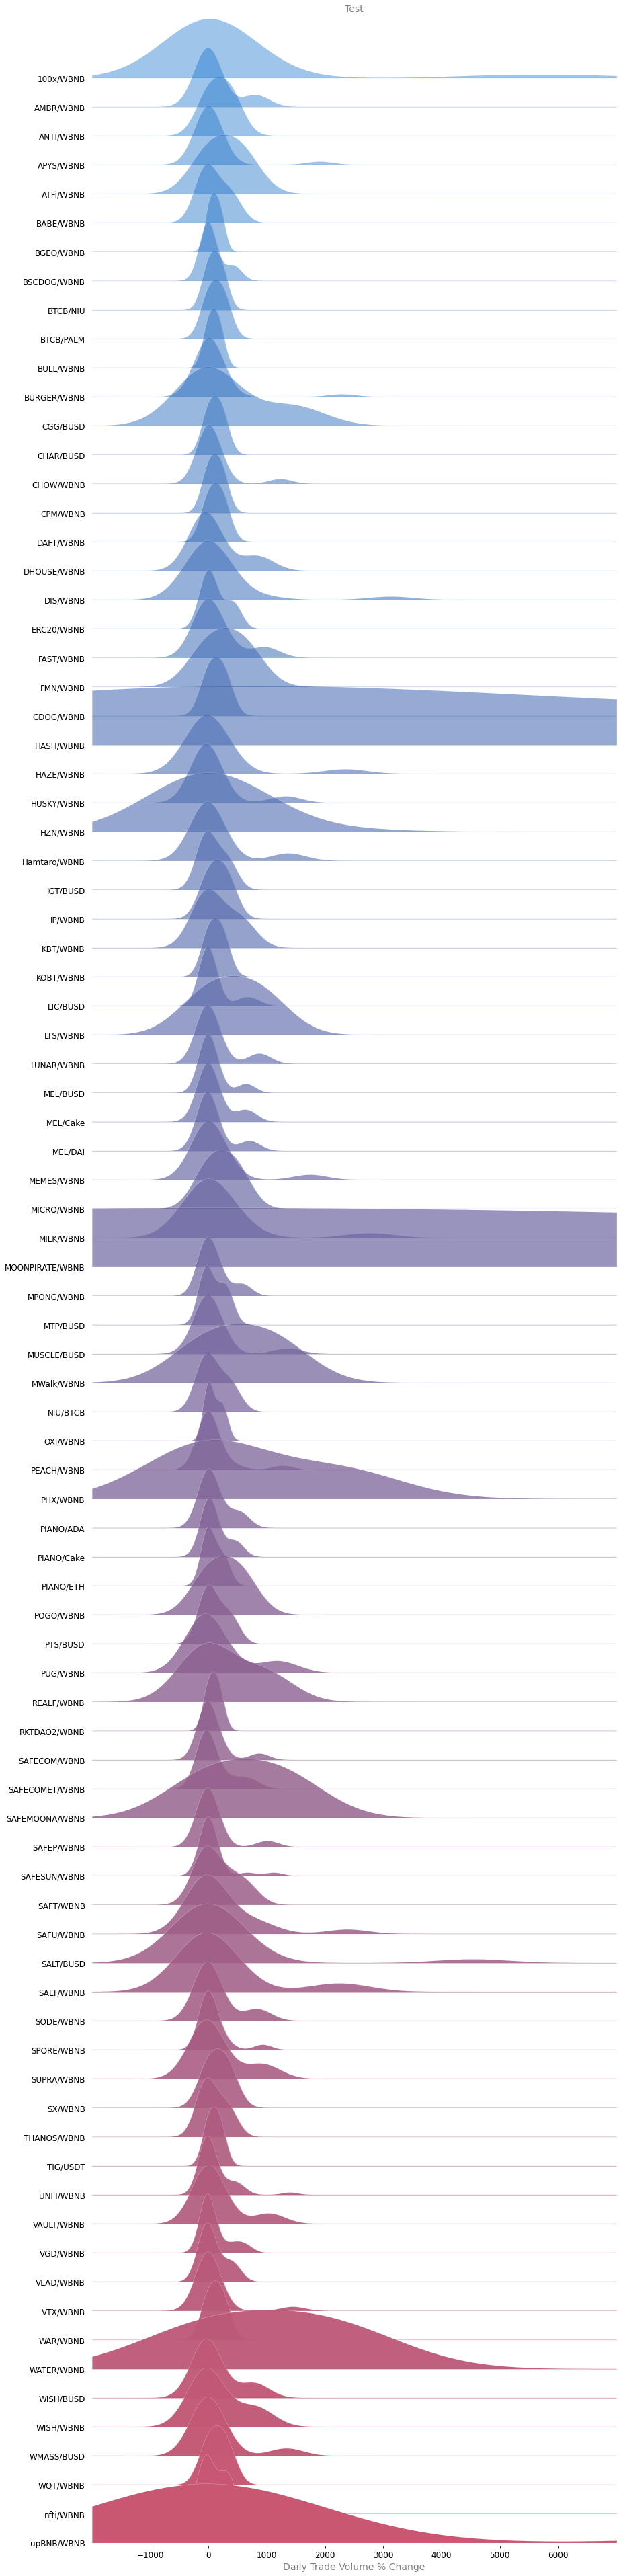

In [229]:
def color_gradient(x=0.0, start=(0, 0, 0), stop=(1, 1, 1)):
    r = np.interp(x, [0, 1], [start[0], stop[0]])
    g = np.interp(x, [0, 1], [start[1], stop[1]])
    b = np.interp(x, [0, 1], [start[2], stop[2]])
    return (r, g, b)

plt.figure(dpi=380)
fig, axes = joypy.joyplot(df2
                          , column='pct_ch' #['hwy', 'cty']
                          , overlap=1
                          , by='pair'
                          , ylim='own'
                          , x_range=(-2000,7000)
                          , fill=True
                          , figsize=(13,53)
                          , legend=False
                          , xlabels=True
                          , ylabels=True
                          #, color=['#76a5af', '#134f5c']
                          , colormap=lambda x: color_gradient(x, start=(.08, .45, .8)
                                                             ,stop=(.8, .34, .44))
                          , alpha=0.6
                          , linewidth=.2
                          , linecolor='w'
                          , fade=True)
plt.title('Test'
          , fontsize=14
          , color='grey'
          , alpha=1)
plt.rc("font", size=12)
plt.xlabel('Daily Trade Volume % Change', fontsize=14, color='grey', alpha=1)
plt.ylabel('Coin', fontsize=8, color='grey', alpha=1)

plt.show

In [33]:
sum_buy_symbol = pd.DataFrame(df.groupby('buy_symbol')['pct_ch'].agg('sum').reset_index().sort_values(by='pct_ch',ascending=False))
coins_to_keep = list(sum_buy_symbol.buy_symbol)
sum_buy_symbol.head(20)

,buy_symbol,pct_ch
1746,WBNB,341225.742706
948,MOONPIRATE,151550.659430
246,BUSD,30672.629607
702,HZN,13166.715975
667,HASH,13016.666667
19,100x,12034.740697
1902,upBNB,9799.128049
1358,SALT,6368.915244
1706,USDT,5662.918994
1353,SAFU,4122.003549


In [35]:
# df['#_trades'].value_counts()
# df[df['#_trades'] > 10000]['pair'].nunique()
coins_to_keep = ['MOONPIRATE','HZN','HASH','100X','upBNB','SALT','UNFI','DIS','MILK','BURGER','CODEX','MEL','PHX','WATER']
df1 = df[df['buy_symbol'].isin(coins_to_keep)]

In [40]:
fig = px.bar(df1
             ,x='trade_date'
             ,y='pct_ch'
             ,color='pair'
             ,log_y=True
#              ,line_shape='spline'
             ,template='plotly_white'
             ,color_discrete_sequence=px.colors.qualitative.Pastel
             ,title='<b>Top Coin Pairs by Daily % Change on PancakeSwap')
fig.show()

# Test

In [ ]:
# df2[df2['Week_Number'] == 18].sort_values(by=['trade_date','pair','sum_pct_change'],ascending=[True,False,True])
filtered_coins = df2[df2['Week_Number'] == 18][['trade_date','pair','sum_pct_change','Week_Number']].sort_values(by='sum_pct_change',ascending=False).reset_index()
filtered_coins

In [ ]:
df['#_trades'] = df['#_trades'].astype('int64')
df.dtypes

In [ ]:
df['pair'] = df['pair'].fillna(0)
df = df[df['pair'].notna()]
df[df['pair'].isna()]

In [ ]:
df['pct_ch1'] = df.groupby(['pair','trade_date'])['#_trades'].pct_change()+1
df['pct_ch2'] = df.groupby(['trade_date','pair'])['#_trades'].apply(lambda x: x.pct_change()).to_numpy()
df['pct_ch3'] = df.groupby(['trade_date','pair'])['#_trades'].pct_change()
df['pct_ch4'] = df['#_trades'] / df.groupby(['trade_date','pair'])['#_trades'].shift(1)
df['pct_ch5'] = df.groupby(['trade_date','pair'])['#_trades'].apply(lambda x: x/x.shift(1))
df['pct_ch6'] = df.groupby(['trade_date','pair'])['#_trades'].apply(lambda x: x.pct_change())
df['pct_ch7'] = (df.groupby(['pair','trade_date'])['#_trades'].apply(pd.Series.pct_change) + 1)
df['pct_ch8'] = (df.groupby(['trade_date','pair'])['#_trades'].apply(lambda dfi : dfi.pct_change()) + 1)

In [ ]:
pd.concat(
    pd.read_csv(os.path.join(dirpath, fname), sep=':', index_col=0, header=None)
    for fname in sorted(os.listdir(dirpath))
).to_csv(output)

In [ ]:
start = pd.to_datetime("4/1/2021")
df['new_date'] = pd.Series(np.arange(len(df)) // 1000) \
              .apply(lambda x: pd.Timedelta(days=x)) + start

or

start = pd.to_datetime("4/1/2021")
df['d'] = start + (df.index // 1000 * pd.Timedelta(days=1))
print(df)

In [16]:
import json
import csv

def get_leaves(item, key=None):
    if isinstance(item, dict):
        leaves = []
        for i in item.keys():
            leaves.extend(get_leaves(item[i], i))
        return leaves
    elif isinstance(item, list):
        leaves = []
        for i in item:
            leaves.extend(get_leaves(i, key))
        return leaves
    else:
        return [(key, item)]


with open('pairs_json.json') as f_input, open('output.csv', 'w', newline='') as f_output:
    csv_output = csv.writer(f_output)
    write_header = True

    for entry in json.load(f_input):
        leaf_entries = sorted(get_leaves(entry))

        if write_header:
            csv_output.writerow([k for k, v in leaf_entries])
            write_header = False
            
        print([v for k,v in leaf_entries])
        csv_output.writerow([v for k, v in leaf_entries])

['ethereum']


In [18]:
def get_leaves(item, key=None):
    if isinstance(item, dict):
        leaves = {}
        for i in item.keys():
            leaves.update(get_leaves(item[i], i))
        return leaves
    elif isinstance(item, list):
        leaves = {}
        for i in item:
            leaves.update(get_leaves(i, key))
        return leaves
    else:
        return {key : item}


with open('pairs_json.json') as f_input:
    json_data = json.load(f_input)

# First parse all entries to get the complete fieldname list
fieldnames = set()

for entry in json_data:
    fieldnames.update(get_leaves(entry).keys())

with open('output.csv', 'w', newline='') as f_output:
    csv_output = csv.DictWriter(f_output, fieldnames=sorted(fieldnames))
    csv_output.writeheader()
    csv_output.writerows(get_leaves(entry) for entry in json_data)

In [37]:
import json
import pandas

data = json.load(open('/Users/max.bade/Downloads/pairs_json.txt'))

def cross_join(left, right):
    return left.assign(key=1).merge(right.assign(key=1), on='key', how='outer').drop('key', 1)

def json_to_dataframe(data_in):
    def to_frame(data, prev_key=None):
        if isinstance(data, dict):
            df = pandas.DataFrame()
            for key in data:
                df = cross_join(df, to_frame(data[key], prev_key + '.' + key))
        elif isinstance(data, list):
            df = pandas.DataFrame()
            for i in range(len(data)):
                df = pandas.concat([df, to_frame(data[i], prev_key)])
        else:
            df = pandas.DataFrame({prev_key[1:]: [data]})
        return df
    return to_frame(data_in)

if __name__ == '__main__':
    with open(data) as json_file:
        json_data = json.load(json_file)

    df = json_to_dataframe(json_data)
#     df.to_csv('output.csv', mode='w')

TypeError: expected str, bytes or os.PathLike object, not dict

In [36]:
data = json.load(open('/Users/max.bade/Downloads/pairs_json.json'))

JSONDecodeError: Extra data: line 1 column 3 (char 2)

In [27]:
# data = json.loads(raw)
data = json.load(open('/Users/max.bade/Downloads/pairs_json.json'))
data = pd.json_normalize(data)
# data.to_csv('output.csv')
# print(data.to_csv())
# df.to_csv('pancakswap_coins.csv', index = None, header=True)

In [28]:
data

,ethereum.dexTrades
0,"[{'buyCurrency': {'symbol': 'BUSD'}, 'sellCurr..."


In [39]:
df = pd.read_json('pancakeswap_coins.json')
df.head()

,ethereum
arguments,"[{'block': {'height': 7167593, 'timestamp': {'..."


In [41]:
df.to_csv('pancakswap_coins.csv', index = None, header=True)

In [8]:
!pwd

/Users/max.bade/Downloads


In [9]:
df = pd.read_json(x)
df.to_csv('test_json.csv')

In [1]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
import pandas as pd

root= tk.Tk()

canvas1 = tk.Canvas(root
                    , width = 300
                    , height = 300
                    , bg = 'lightsteelblue2'
                    , relief = 'raised'
                   )
canvas1.pack()

label1 = tk.Label(root
                  , text='File Conversion Tool'
                  , bg = 'lightsteelblue2')
label1.config(font=('helvetica', 20))
canvas1.create_window(150, 60, window=label1)

def getJSON ():
    global read_file
    
    import_file_path = filedialog.askopenfilename()
    read_file = pd.read_json (import_file_path)
    
browseButton_JSON = tk.Button(text="      Import JSON File     "
                              , command=getJSON
                              , bg='green'
                              , fg='black'
                              , font=('helvetica', 12, 'bold')
                             )
canvas1.create_window(150, 130, window=browseButton_JSON)

def convertToCSV ():
    global read_file
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    read_file.to_csv (export_file_path
                      , index = None
                      , header=True)

saveAsButton_CSV = tk.Button(text='Convert JSON to CSV'
                             , command=convertToCSV
                             , bg='green'
                             , fg='black'
                             , font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 180, window=saveAsButton_CSV)

def exitApplication():
    MsgBox = tk.messagebox.askquestion ('Exit Application'
                                        ,'Are you sure you want to exit the application'
                                         ,icon = 'warning')
    if MsgBox == 'yes':
        root.destroy()
        
exitButton = tk.Button (root
                        , text='       Exit Application     '
                        , command=exitApplication
                        , bg='brown'
                        , fg='black'
                        , font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 230, window=exitButton)

root.mainloop()

SystemExit: 0

/Users/max.bade/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [9]:
df = pd.read_json(x)
df.head()

,ethereum
0,"{'arguments': [{'block': {'height': 7167593, '..."


In [21]:
data = json.load(open('/Users/max.bade/Downloads/pancakeswap_coins.json'))
jtopy=json.dumps(data) #json.dumps take a dictionary as input and returns a string as output.
x=json.loads(jtopy) # json.loads take a string as input and returns a dictionary as output.
# print(dict_json["shipments"])
x

{'ethereum': {'arguments': [{'block': {'height': 7167593,
     'timestamp': {'unixtime': 1620248019}},
    'argument': {'name': 'token1', 'type': 'address'},
    'reference': {'address': '0xd0e0204b1ad603df1cbeb10d5ab3b10a0b0a92bc',
     'smartContract': {'currency': {'name': '-'}}}},
   {'block': {'height': 7167593, 'timestamp': {'unixtime': 1620248019}},
    'argument': {'name': 'token0', 'type': 'address'},
    'reference': {'address': '0xbb4cdb9cbd36b01bd1cbaebf2de08d9173bc095c',
     'smartContract': {'currency': {'name': 'Wrapped BNB'}}}},
   {'block': {'height': 7167586, 'timestamp': {'unixtime': 1620247998}},
    'argument': {'name': 'token0', 'type': 'address'},
    'reference': {'address': '0x62c2455eb8b92ea8c7cb4bd0caeebca0cf846dea',
     'smartContract': {'currency': {'name': '-'}}}},
   {'block': {'height': 7167586, 'timestamp': {'unixtime': 1620247998}},
    'argument': {'name': 'token1', 'type': 'address'},
    'reference': {'address': '0xbb4cdb9cbd36b01bd1cbaebf2de08d91

In [33]:
# x = json.loads(x)
x = jtopy

f = csv.writer(open("pancakswap_coins.csv", "wb+"))

# Write CSV Header, If you dont need that, remove this line
# f.writerow(["pk", "model", "codename", "name", "content_type"])
f.writerow(["block", "height", "timestamp"
            , "name", "type", "address"
            , "currency", "name"])

# for x in x:
#     f.writerow([x["pk"],
#                 x["model"],
#                 x["fields"]["codename"],
#                 x["fields"]["name"],
#                 x["fields"]["content_type"]])

for x in x:
    f.writerow([x["ethereum"]["arguments"]["block"]["height"],
                x["ethereum"]["arguments"]["block"]["timestamp"]["unixtime"],
                x["ethereum"]["arguments"]["argument"]["name"],
                x["ethereum"]["arguments"]["argument"]["type"],
                x["ethereum"]["reference"]["address"],
                x["ethereum"]["reference"]["smartContract"]["currency"]["name"]
               ])

TypeError: a bytes-like object is required, not 'str'

In [37]:
x = json.load(open('/Users/max.bade/Downloads/pancakeswap_coins.json'))
with open(x) as json_file:
    data = json.dumps(json_file)

TypeError: expected str, bytes or os.PathLike object, not dict

In [34]:
# Python program to convert
# JSON file to CSV

import json
import csv
  
# Opening JSON file and loading the data
# into the variable data

x = json.load(open('/Users/max.bade/Downloads/pancakeswap_coins.json'))
with open(x) as json_file:
    data = json.load(json_file)
    
coins_data = data["ethereum"]["arguments"]
  
# now we will open a file for writing
data_file = open('data_file.csv', 'w')
  
# create the csv writer object
csv_writer = csv.writer(data_file)
  
# Counter variable used for writing 
# headers to the CSV file
count = 0
  
for coin in coins_data:
    if count == 0:
  
        # Writing headers of CSV file
        header = coin.keys()
        csv_writer.writerow(header)
        count += 1
  
    # Writing data of CSV file
    csv_writer.writerow(coin.values())

data_file.close()

TypeError: expected str, bytes or os.PathLike object, not dict